### Paso 1

In [1]:
###PASO 1
#0 importacion de librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from math import factorial
from scipy import stats as st
#1 carga de archivo
df=pd.read_csv('/datasets/games.csv')
#2
df.info(show_counts=True)
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
                       Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08  

### Paso 2

In [2]:
###PASO 2
#Reemplaza los nombres de las columnas (ponlos en minúsculas).
df.columns = df.columns.str.lower()
#rellenamos valores ausentes
df['name'] = df['name'].fillna('Desconocido')
df['year_of_release'] = df['year_of_release'].fillna(0)
df['genre'] = df['genre'].fillna('Desconocido')
df['critic_score'] = df['critic_score'].fillna(0)
df['user_score'] = df['user_score'].fillna(0)
df['rating'] = df['rating'].fillna('RP')
#Convierte los datos en los tipos necesarios.
df['year_of_release']=df['year_of_release'].astype('int')
#valores TBD
df['rating'].replace('tbd','RP')
df.info(show_counts=True)
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16715 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16715 non-null  int64  
 3   genre            16715 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     16715 non-null  float64
 9   user_score       16715 non-null  object 
 10  rating           16715 non-null  object 
dtypes: float64(5), int64(1), object(5)
memory usage: 1.4+ MB
                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform  

In [3]:
print(df.duplicated().sum())
print(df.isna().sum())

0
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64


* Se cambio el tipo de datos en la columna 'year_of_release' ya que esta estaba en tipo float y la pasamos a tipo de dto int ya que esta columna contiene datos de los años en la que se realizo
* se relleno los valores ausente en caso de la columna 'name' son la denominacion de 'Desconocido', en caso de la columna 'year_of_release' se relleno con valores en 0 ya que no tenemos el año en el que se lanzo, en caso de la columna 'genre' se relleno con 'Desconocido' ya que no se tiene el genero al cual pertenece, en cuanto a las columnas 'critic_score' y 'user_score' se relleo con valores de 0 ya que no tiene score asignado y en cuanto a la columna 'rating' los valores se rellenaron a RP que serian que falta determinar.
* Los valores ausentes se deben probablemente a que el tipo de datos no era e correspondiente.
* Se presto atención a la abreviatura TBD la cual se cambio por la denominacion RP que significa que falta especificar.

In [4]:
df['total_venta']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']
print(df.head())

                       name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  \
0     28.96      3.77         8.45          76.0          8      E   
1      3.58      6.81         0.77           0.0          0     RP   
2     12.76      3.79         3.29          82.0        8.3      E   
3     10.93      3.28         2.95          80.0          8      E   
4      8.89     10.22         1.00           0.0          0     RP   

   total_venta  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4      

Se grego una columna al final en la cual se puede observar la suma total de las ventas tanto en norteamerica, europa, japon y demas paises.

### Paso 3

In [5]:
###PASO 3
#Mira cuántos juegos fueron lanzados en diferentes años. ¿Son significativos los datos de cada período?
juegos_año=df.groupby('year_of_release')['name'].count().reset_index(name='cantidad_juegos')
print(juegos_año)

    year_of_release  cantidad_juegos
0                 0              269
1              1980                9
2              1981               46
3              1982               36
4              1983               17
5              1984               14
6              1985               14
7              1986               21
8              1987               16
9              1988               15
10             1989               17
11             1990               16
12             1991               41
13             1992               43
14             1993               62
15             1994              121
16             1995              219
17             1996              263
18             1997              289
19             1998              379
20             1999              338
21             2000              350
22             2001              482
23             2002              829
24             2003              775
25             2004              762
2

En los datos que observamos se puede ver que tenemos 269 juegos de los cuales no sabemos cual fue su año de lanzamiento; po otro lado desde 1980 tenemos diferente cantidad de juegos que fueron lanzados año tras año, desde 1980 hasta 1993 la cantidad se mantuvo relativamente igual mas al 1994 hasta 2012 hubo un crecimiento significativo creciente y para el 2012 hasta el 2016 hubo una reduccion significativa que se mantuvo durante esos 5 años

In [6]:
#Observa cómo varían las ventas de una plataforma a otra.
#Elige las plataformas con las mayores ventas totales y
ventas_plataf=df.groupby('platform')['total_venta'].sum().sort_values(ascending=False)
print(ventas_plataf.head())
#construye una distribución basada en los datos de cada año. 
#Busca las plataformas que solían ser populares pero que ahora no tienen ventas. 
top_plataformas = ventas_plataf.head().index.tolist()
df_top = df[df['platform'].isin(top_plataformas)]
ventas_por_año = df_top.groupby('year_of_release')['total_venta'].sum().sort_index()
print(ventas_por_año)


platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
Name: total_venta, dtype: float64
year_of_release
0        60.37
1985      0.02
2000     39.17
2001    166.43
2002    205.38
2003    184.31
2004    229.08
2005    299.05
2006    432.96
2007    544.30
2008    624.31
2009    604.13
2010    530.81
2011    386.90
2012    239.82
2013    211.96
2014     86.25
2015     29.92
2016      5.30
Name: total_venta, dtype: float64


Se observa que las 5 plataformas que mas ventas totales generaron son "PS2, x360, PS3, Wii y DS", plataformas que tuvieron ventas crecientes desde 2000 hasta 2010 luego tuvo un decrecimiento dedee el 2011 hasta el 2016. LA plataforma con mas ventas fue "PS2"

Tomaremos datos dentro de los años del 2010 al 2016 para construir el modelo del 2017.

In [7]:
df_modelo = df[(df['year_of_release'] >= 2012) & (df['year_of_release'] <= 2016)].copy()
ventas_por_año_plataformas = (df_modelo.groupby(['year_of_release', 'platform'])['total_venta'].sum().unstack(fill_value=0))

ventas_por_año_plataformas['total_año'] = ventas_por_año_plataformas.sum(axis=1)
ventas_por_año_plataformas.loc['total_plataforma'] = ventas_por_año_plataformas.sum(axis=0)

print(ventas_por_año_plataformas)

platform             3DS     DS     PC     PS3     PS4    PSP    PSV    Wii  \
year_of_release                                                               
2012               51.36  11.01  23.22  107.36    0.00   7.69  16.19  21.71   
2013               56.57   1.54  12.38  113.25   25.99   3.14  10.59   8.59   
2014               43.76   0.00  13.28   47.76  100.00   0.24  11.90   3.75   
2015               27.78   0.00   8.52   16.82  118.90   0.12   6.25   1.14   
2016               15.14   0.00   5.25    3.60   69.25   0.00   4.25   0.18   
total_plataforma  194.61  12.55  62.65  288.79  314.14  11.19  49.18  35.37   

platform           WiiU    X360    XOne  total_año  
year_of_release                                     
2012              17.56   99.74    0.00     355.84  
2013              21.65   88.58   18.96     361.24  
2014              22.03   34.74   54.07     331.53  
2015              16.35   11.96   60.14     267.98  
2016               4.60    1.52   26.15     129.9

Desde el 2012 al 2016 la plataformas "DS y PSP" fueron perdiendo los ingresos que estos generaban, la plataforma que tiene las mayores ventas en el ultimo año son "PS4, XOne y 3DS"; dentro de los 5 ultimos años las plataformas con mayores ventas fueron "PS4, PS3 y X360".

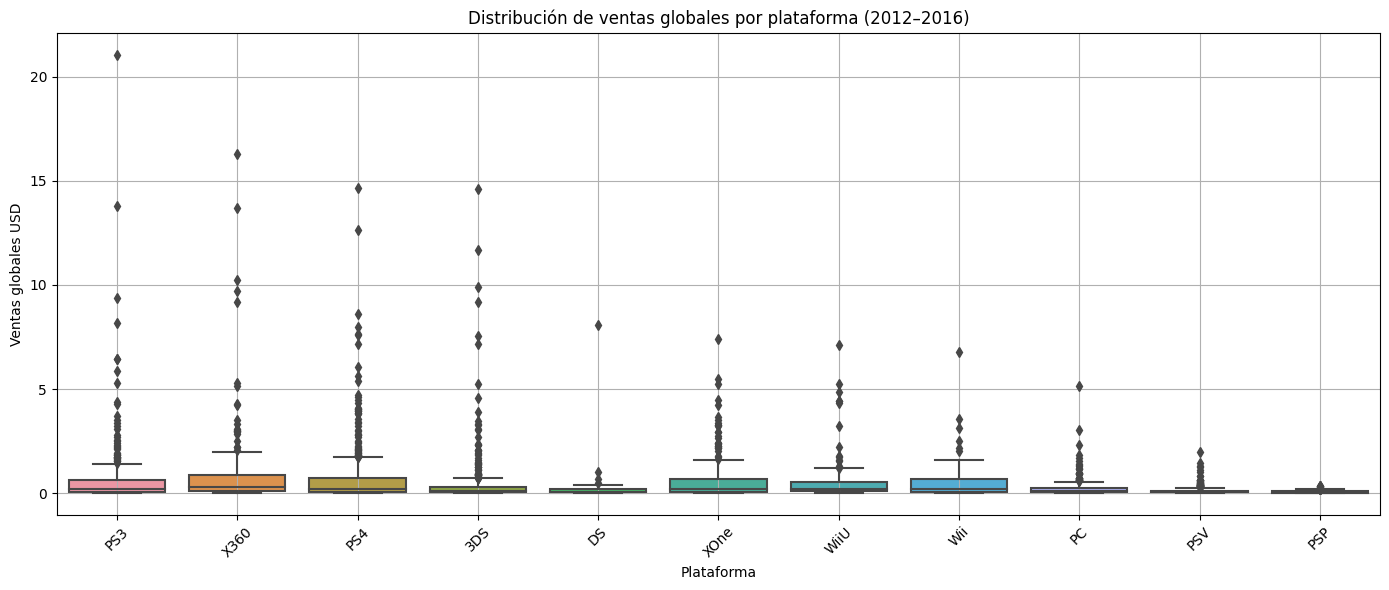

In [8]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_modelo, x='platform', y='total_venta')

plt.title('Distribución de ventas globales por plataforma (2012–2016)')
plt.xlabel('Plataforma')
plt.ylabel('Ventas globales USD')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

Se puede observar que las plataformas "PS4 y X360" tienen las ventas mayores y "PSV y PSP" tiene las ventas mas bajas.

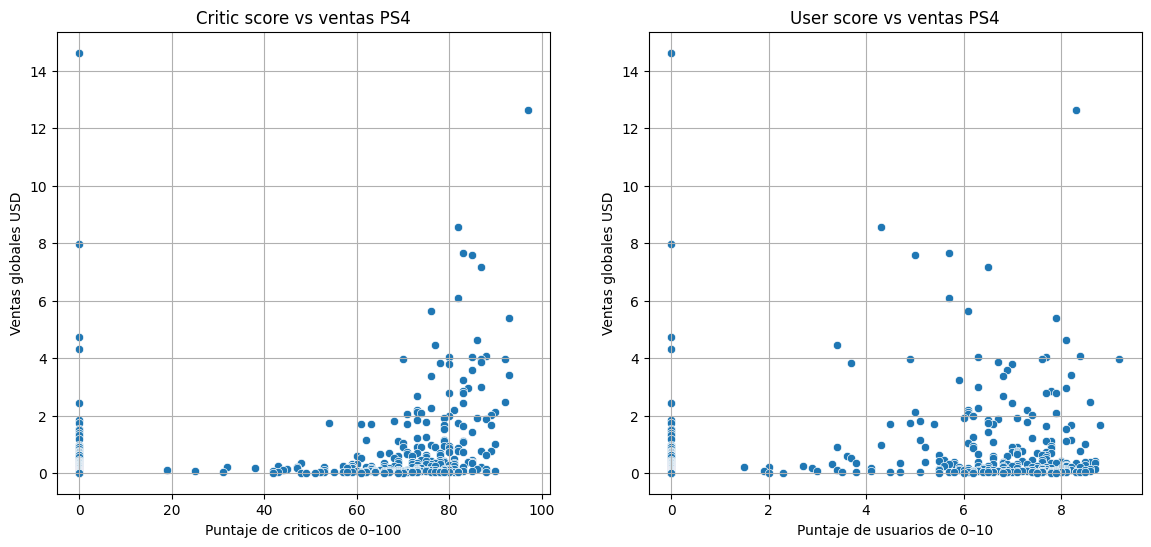

Correlacion critic score vs ventas: 0.22754960627752652
Correlacion user score vs ventas: 0.10493810283090231


In [9]:
#Crea un gráfico de dispersión y calcula la correlación entre las reseñas y las ventas.
df_ps4 = df_modelo[df_modelo['platform'] == 'PS4'].copy()
df_ps4['user_score'] = pd.to_numeric(df_ps4['user_score'], errors='coerce')

plt.figure(figsize=(14, 6))
# Gráfico 1: User Score vs Ventas
plt.subplot(1, 2, 2)
sns.scatterplot(data=df_ps4, x='user_score', y='total_venta')
plt.title('User score vs ventas PS4')
plt.xlabel('Puntaje de usuarios de 0–10')
plt.ylabel('Ventas globales USD')
plt.grid(True)
# Gráfico 2: Critic Score vs Ventas
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_ps4, x='critic_score', y='total_venta')
plt.title('Critic score vs ventas PS4')
plt.xlabel('Puntaje de criticos de 0–100')
plt.ylabel('Ventas globales USD')
plt.grid(True)
plt.show()

cor_critic = df_ps4['critic_score'].corr(df_ps4['total_venta'])
cor_user = df_ps4['user_score'].corr(df_ps4['total_venta'])

print('Correlacion critic score vs ventas:',cor_critic)
print('Correlacion user score vs ventas:',cor_user)

En el grafico de dispersión de criticos se observa que los puntajes desde 60 hasta 90  van de forma creciente con las ventas; mas en el puntaje de usuario se ve que el puntabe se mantiene entre 6 y 8 pero no van creciendo las ventas.

In [10]:
#¿Qué se puede decir de los géneros más rentables?
df_generos=df.groupby('genre')['total_venta'].sum().sort_values(ascending=False)
print(df_generos)

genre
Action          1744.17
Sports          1331.27
Shooter         1052.45
Role-Playing     934.56
Platform         827.77
Misc             802.51
Racing           728.67
Fighting         447.53
Simulation       389.97
Puzzle           242.57
Adventure        237.59
Strategy         174.23
Desconocido        2.42
Name: total_venta, dtype: float64


Dentro de los 3 generos más vendidos tenemos "action, sports y shooter" y los demas generos tienen ventas menores a las 3 mencionadas.

### Paso 4

In [11]:
###PASO 4. Crea un perfil de usuario para cada región
##REGION NA
df_na=df_modelo.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
print(df_na.head())
df_eu=df_modelo.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
print(df_eu.head())
df_jp=df_modelo.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
print(df_jp.head())

platform
X360    140.05
PS4     108.74
PS3     103.38
XOne     93.12
3DS      55.31
Name: na_sales, dtype: float64
platform
PS4     141.09
PS3     106.86
X360     74.52
XOne     51.59
3DS      42.64
Name: eu_sales, dtype: float64
platform
3DS     87.79
PS3     35.29
PSV     21.04
PS4     15.96
WiiU    13.01
Name: jp_sales, dtype: float64


Dentro de los datos tomados de los ultimos 5 años en base a las plataformas y las ventas que regresentan a Norteamerica, Europa y Japon se observo que las plataformas de PS4, PS3 y 3DS se encuntran en los 3 lugares pudiendo se esta forma ver que estan dentro de las plataformas preferiadas. Por otra parte tambien que observa que en Norteamerica y Europa tiene entre los 3 primeros lugares en plataformas tenemos a "X360, PS4 y PS3" y las plataformas "PSV y WiiU" solo tienen presencia en Japon mas no en los otros 2 lugares.

In [12]:
df_na=df_modelo.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
print(df_na.head())
df_eu=df_modelo.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
print(df_eu.head())
df_jp=df_modelo.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
print(df_jp.head())

genre
Action          177.84
Shooter         144.77
Sports           81.53
Role-Playing     64.00
Misc             38.19
Name: na_sales, dtype: float64
genre
Action          159.34
Shooter         113.47
Sports           69.09
Role-Playing     48.53
Racing           27.29
Name: eu_sales, dtype: float64
genre
Role-Playing    65.44
Action          52.80
Misc            12.86
Simulation      10.41
Fighting         9.44
Name: jp_sales, dtype: float64


Dentro de los datos tomados de los ultimos 5 años en base a los generos que se prefieren tenemos en los 3 lugares son "Action y Role-PLaying"; asi tambien se observa que tenemos generos como "Shooter y Sports" que no son vendidos en Japon y los generos de "Simulation y Fighting" solo son vendidos pendro de los 5 primero generos en Japon

In [13]:
df_na=df_modelo.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
print(df_na.head())
df_eu=df_modelo.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
print(df_eu.head())
df_jp=df_modelo.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
print(df_jp.head())

rating
M       231.57
E       114.37
RP      103.31
E10+     75.70
T        66.02
Name: na_sales, dtype: float64
rating
M       193.96
E       113.03
RP       91.50
E10+     55.37
T        52.96
Name: eu_sales, dtype: float64
rating
RP      108.84
E        28.33
T        26.02
M        21.20
E10+      8.19
Name: jp_sales, dtype: float64


Se observa que en Norteamerica y Europa se tiene las mismas 5 clasificaciones y en el mismo orden de preferencia dentro de las cuales los juego para mayores de 17 años son los mas vendidos y en 5to puesto en los 3 lugares tenemos a los de clasificacion E10+ que son para personas de 10 años a más.

### Paso 5

In [33]:
#Las calificaciones promedio de los usuarios para las plataformas Xbox One y PC son las mismas.
#df_modelo.info()
df_modelo['user_score'] = pd.to_numeric(df_modelo['user_score'], errors='coerce')
xone_scores = df_modelo[df_modelo['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df_modelo[df_modelo['platform'] == 'PC']['user_score'].dropna()

stat_levene, p_levene = st.levene(xone_scores, pc_scores)
print("Valor p de Levene (igualdad de varianzas):", p_levene)

p_value = st.ttest_ind(xone_scores, pc_scores, equal_var=False)
print('p-value:', p_value.pvalue)
alpha = 0.05
if (p_value.pvalue <alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Valor p de Levene (igualdad de varianzas): 0.48384924931759254
p-value: 0.15682360021070552
No podemos rechazar la hipótesis nula


Las calificaciones de los usuarios para ambas plataformas son estadisticamente igual.

In [34]:
#Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son diferentes.
df_modelo['user_score'] = pd.to_numeric(df_modelo['user_score'], errors='coerce')
accion_scores = df_modelo[df_modelo['genre'] == 'Action']['user_score'].dropna()
deportes_scores = df_modelo[df_modelo['genre'] == 'Sports']['user_score'].dropna()
print('Promedio accion:',accion_scores.mean())
print('Promedio deportes:',deportes_scores.mean())

stat_levene, p_levene = st.levene(accion_scores, deportes_scores)
print("Valor p de Levene (igualdad de varianzas):", p_levene)

p_value = st.ttest_ind(accion_scores, deportes_scores, equal_var=False)
print('p-value:', p_value.pvalue)
alpha = 0.05
if (p_value.pvalue <alpha):
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula")

Promedio accion: 3.631230925737538
Promedio deportes: 4.272690763052209
Valor p de Levene (igualdad de varianzas): 1.5161210001047447e-35
p-value: 0.0020226086787488683
Rechazamos la hipótesis nula


Las calificaciones promedio de los usuarios para los géneros de Acción y Deportes son significativamente diferentes.

### CONCLUSIONES

Se observo la similitud del uso de las plataformas en Norteamerica y Europa asi como Japon en alguno de ellos tambien pudimos ver las similitud que hay en el consumo de los generos de los videojuegos. Se observo los ingresos que las ventas de cada videojuego genera por cada año y el impacto que este puede generar para la toma de decisiones para los proximos lanzamientos. Tambien se puede ver que juego ya no deben ser producidos para determinadas pltaformas que ya no se usan al pasar de los años.